In [105]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt

**Telefónica**

Análisis Genérico

In [106]:
telefonica = pd.read_csv('./data/telefnica.csv')
telefonica.head(3)

,Date,Close,High,Low,Open,Volume
0,1994-11-17,2.546,2.584,2.531,2.568,6060000
1,1994-11-18,2.553,2.568,2.531,2.553,8690000
2,1994-11-21,2.599,2.599,2.576,2.576,5040000


In [107]:
telefonica.isna().sum()

Date      0
Close     0
High      0
Low       0
Open      0
Volume    0
dtype: int64

Máximo valor que ha obtenido

In [108]:
telefonica.High.max()

27.346

In [109]:
telefonica.Close.max()

26.916

In [110]:
telefonica.Open.max()

27.04

Valor mínimo que ha obtenido

In [111]:
telefonica.Low.min()

2.197

In [112]:
telefonica.Open.min()

2.2430000000000003

In [113]:
telefonica.Close.min()

2.258



Serie temporal

In [114]:
telefonica = telefonica.set_index('Date')

In [115]:
telefonica.drop(['Volume'], axis=1, inplace=True)

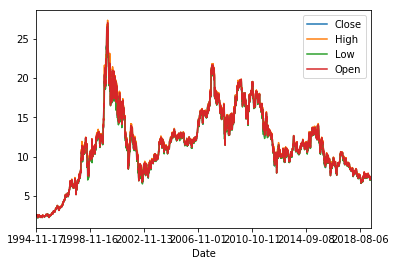

In [116]:
telefonica.plot()

**Comparación BBVA vs Santander**

In [117]:
bbva = pd.read_csv('./data/bbva.csv')
bbva.head(3)

,Date,Close,High,Low,Open,Volume
0,1994-11-17,1.848,1.856,1.829,1.829,4160000
1,1994-11-18,1.853,1.861,1.831,1.840,4040000
2,1994-11-21,1.861,1.867,1.853,1.861,3390000


In [118]:
santander = pd.read_csv('./data/santander.csv')
santander.head(3)

,Date,Close,High,Low,Open,Volume
0,1994-11-17,1.656,1.656,1.634,1.640,5460000
1,1994-11-18,1.659,1.672,1.650,1.656,7370000
2,1994-11-21,1.665,1.687,1.659,1.678,5180000


In [119]:
bbva.isna().sum()

Date      0
Close     0
High      0
Low       0
Open      0
Volume    0
dtype: int64

In [120]:
santander.isna().sum()

Date      0
Close     0
High      0
Low       0
Open      0
Volume    0
dtype: int64

In [121]:
print("El mínimo alcanzado por el BBVA en cierre es de " + str(bbva.Close.min()))
print("El mínimo alcanzado por el Santander en cierre es de " + str(santander.Close.min()))

El mínimo alcanzado por el BBVA en cierre es de 1.712
El mínimo alcanzado por el Santander en cierre es de 1.3119999999999998


In [122]:
print("El máximo alcanzado por el BBVA en cierre es de " + str(bbva.Close.max()))
print("El máximo alcanzado por el Santander en cierre es de " + str(santander.Close.max()))

El máximo alcanzado por el BBVA en cierre es de 16.269000000000002
El máximo alcanzado por el Santander en cierre es de 14.79


In [123]:
print("El máximo alcanzado por el BBVA en apertura es de " + str(bbva.Open.max()))
print("El máximo alcanzado por el Santander en apertura es de " + str(santander.Open.max()))

El máximo alcanzado por el BBVA en apertura es de 16.269000000000002
El máximo alcanzado por el Santander en apertura es de 14.79


Esto quiere decir que el día que más alto cerraron abrieron al día siguiente con el mismo precio

In [124]:
print("El máximo alcanzado por el BBVA de siempre es de " + str(bbva.High.max()))
print("El máximo alcanzado por el Santander de siempre es de " + str(santander.High.max()))

El máximo alcanzado por el BBVA de siempre es de 16.430999999999997
El máximo alcanzado por el Santander de siempre es de 14.79


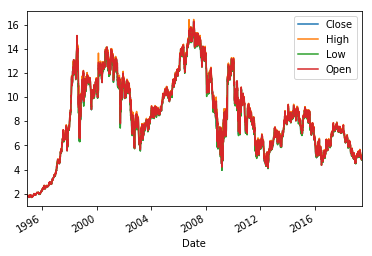

In [125]:
bbva = bbva.set_index('Date')
bbva.drop(['Volume'], axis=1, inplace=True)
bbva.index = pd.to_datetime(bbva.index)
bbva.plot()

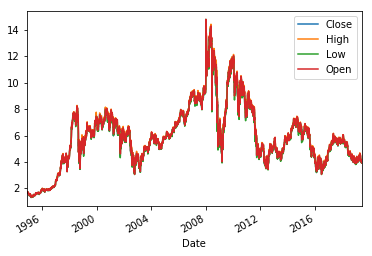

In [126]:
santander = santander.set_index('Date')
santander.drop(['Volume'], axis=1, inplace=True)
santander.index = pd.to_datetime(santander.index)
santander.plot()

Se pueden observar numerosas similitudes, comparemos también con TFC

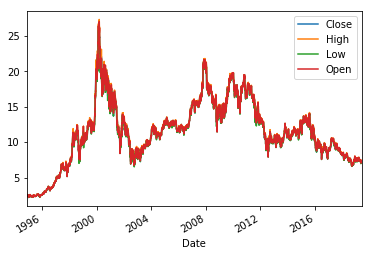

In [127]:
telefonica.index = pd.to_datetime(telefonica.index)
telefonica.plot()

**Comparemos con las entradas de los presidentes del gobierno de España**

In [128]:
dataPresis = [['Aznar', '04-05-1996'], ['Aznar', '26-04-2000'], ['Zapatero', '17-04-2004'], ['Zapatero', '11-04-2008'], ['Rajoy', '20-12-2011'], ['Rajoy', '30-10-2016'], ['Sánchez', '02-06-2018']]
presidentes = pd.DataFrame(dataPresis, columns=['Presidente', 'Fecha'])
presidentes

,Presidente,Fecha
0,Aznar,04-05-1996
1,Aznar,26-04-2000
2,Zapatero,17-04-2004
3,Zapatero,11-04-2008
4,Rajoy,20-12-2011
5,Rajoy,30-10-2016
6,Sánchez,02-06-2018


    GOBIERNO DE AZNAR

In [132]:
presidentes['Fecha'] = pd.to_datetime(presidentes['Fecha'])
mask = (telefonica.index > presidentes.Fecha[0]) & (telefonica.index <= presidentes.Fecha[2])
telefonica.loc[mask].head()

,Close,High,Low,Open
Date,,,,
1996-04-08,2.978,3.015,2.978,3.015
1996-04-09,3.008,3.015,2.985,2.993
1996-04-10,3.031,3.031,3.008,3.015
1996-04-11,3.008,3.023,3.000,3.008
1996-04-12,3.031,3.031,3.008,3.023


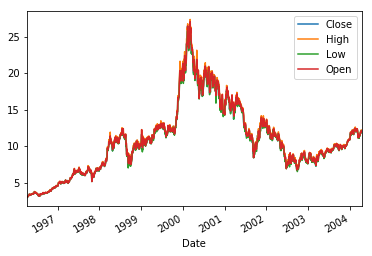

In [130]:
telefonica.loc[mask].plot()

Durante el gobierno de Aznar se puede observar como telefónica creció, llegando a picos sobre el año 2000

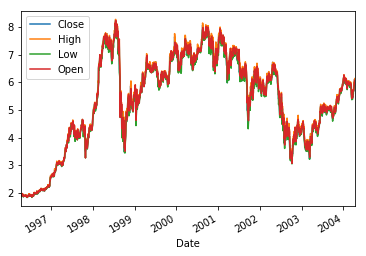

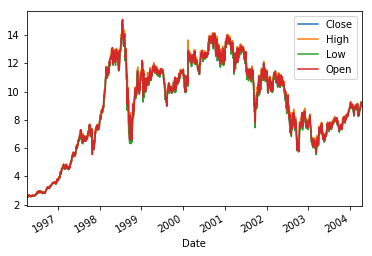

In [131]:
santander.loc[mask].plot()
bbva.loc[mask].plot()

Se puede observar como tanto el santander como el BBVA también crecieron, con picos entre 1998 y 1999, y a pesar de que las 3 empresas tuvieron una ligera recesión sobre 2002, acabaron la legislatura creciendo

    GOBIERNO DE ZAPATERO

In [134]:
mask = (telefonica.index > presidentes.Fecha[2]) & (telefonica.index <= presidentes.Fecha[4])
telefonica.loc[mask].head()

,Close,High,Low,Open
Date,,,,
2004-04-19,12.013,12.032,11.920,11.967
2004-04-20,12.116,12.162,12.050,12.060
2004-04-21,11.939,12.078,11.892,11.985
2004-04-22,11.855,11.995,11.772,11.902
2004-04-23,11.930,12.013,11.911,11.967


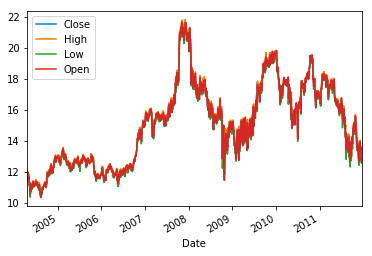

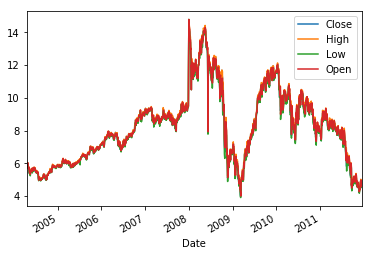

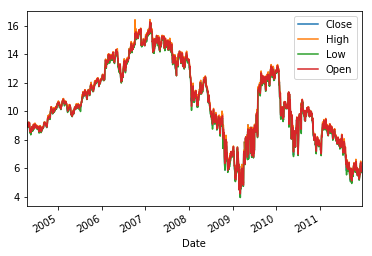

In [135]:
telefonica.loc[mask].plot()
santander.loc[mask].plot()
bbva.loc[mask].plot()

Se puede observar como la correcta dinámica que llevaba España se mantuvo hasta 2007-2008, cuando empezó la crisis y todas las empresas cayeron en recesión.

    GOBIERNO DE RAJOY

In [136]:
mask = (telefonica.index > presidentes.Fecha[4]) & (telefonica.index <= presidentes.Fecha[6])
telefonica.loc[mask].head()

,Close,High,Low,Open
Date,,,,
2011-12-21,12.801,13.195,12.767,13.116
2011-12-22,12.959,12.969,12.816,12.816
2011-12-23,13.072,13.141,13.003,13.092
2011-12-27,13.043,13.175,12.979,13.116
2011-12-28,12.811,13.107,12.796,13.018


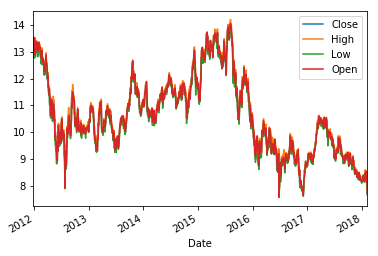

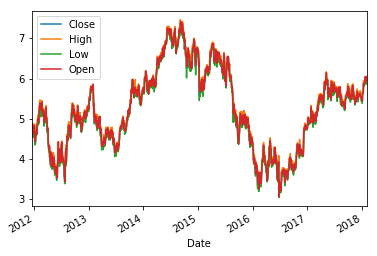

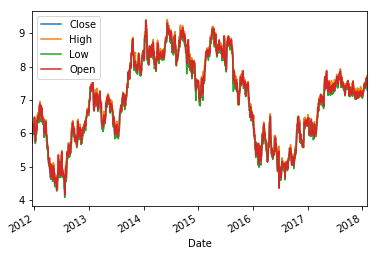

In [137]:
telefonica.loc[mask].plot()
santander.loc[mask].plot()
bbva.loc[mask].plot()

Durante el Gobierno de Mariano Rajoy se mantuvo la recesión. Se frenó la caída, pero no empezó la recuperación de la economía al menos al nivel de estas empresas.

    GOBIERNO DE SANCHEZ

In [139]:
mask = telefonica.index > presidentes.Fecha[6]
telefonica.loc[mask].head()

,Close,High,Low,Open
Date,,,,
2018-02-07,7.885,7.920,7.714,7.809
2018-02-08,7.656,7.877,7.622,7.877
2018-02-09,7.522,7.712,7.491,7.697
2018-02-12,7.597,7.674,7.570,7.610
2018-02-13,7.487,7.614,7.461,7.612


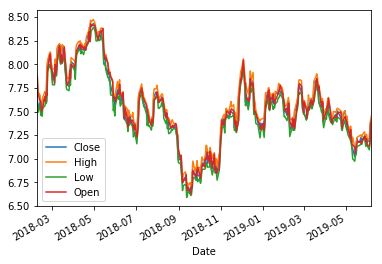

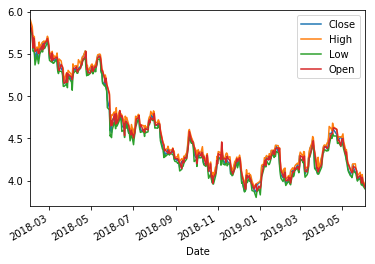

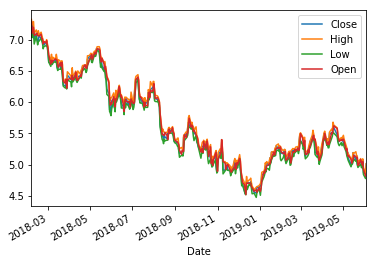

In [140]:
telefonica.loc[mask].plot()
santander.loc[mask].plot()
bbva.loc[mask].plot()

Como se puede observar, desde la entrada de Pedro Sánchez la economía se ha vuelto a resentir, y las tres empresas acumulan pérdidas en su valor en bolsa